In [1]:
import gwsurrogate
import numpy as np

from math import cos
from math import sin
from math import sqrt
from math import factorial
from math import pi
from math import e
from numpy import conj

import bilby
import gwpy
import WaVel

import matplotlib.pyplot as plt
%matplotlib inline

# Define constants: speed of light (in m/s), gravitational constant (in m^3/(kg*s^2)), solar mass (in kg) and megaparsec (in m)
c = 2.99e8
G = 6.67e-11
M_sun = 1.99e30
Mpc = 3.09e22

/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


In [3]:
# Define labels, sampling frequency and times
outdir = 'outdir'
label = 'moving_bbh'
sampling_frequency = 1024
duration = 2.0
geocent_time = 0.0
start_time = geocent_time - duration + 0.02

#frequency domain
# Load the surrogate model
surrogate = gwsurrogate.LoadSurrogate('NRHybSur3dq8')


Loaded NRHybSur3dq8 model


In [ ]:
def myFun(**kwargs):
    for key, value in kwargs.items():
        print ("%s == %s" %(key, value))
 
# Driver code
myFun(first ='Geeks', mid ='for', last='Geeks') 

In [28]:
# using gwpy time-series fft
#frequency domain
# Define the time-domain model
dt = 1/sampling_frequency
time_array_ = np.arange(start_time,start_time+duration,dt)
def moving_bbh(freq_array, mass, ratio, distance, theta, phi, speed, v_the, v_phi,**kwargs):
    #len(times)=duration*sampling_frequency
    times = time_array_
    
    arg_ = {'surrogate_':surrogate,'M_':mass, 'q_':ratio, 'dis_':distance, 'the_':theta, 'phi_':phi, 'v_mag_':speed, 'v_the_':v_the, 'v_phi_':v_phi, 'times_':times, **kwargs}
    fplus = WaVel.Fn(**arg_)
    h_plus = gwpy.timeseries.TimeSeries(fplus.WaVe()[0], unit='dimensionless', t0=start_time,\
                                        dt=dt, name='Strain', channel=None)
    h_cross = gwpy.timeseries.TimeSeries(fplus.WaVe()[1], unit='dimensionless', t0=start_time,\
                                        dt=dt, name='Strain', channel=None)
    
    fplus = h_plus.fft()
    fcross = h_cross.fft()
    
    print(times[0],times[-1],times[1]-times[0],len(times))
    print(freq_array[0],freq_array[-1],freq_array[1]-freq_array[0],len(freq_array))

    return {'plus': fplus.value, 'cross': fcross.value}

In [17]:
#frequency domain
# Define the time-domain model
dt = 1/sampling_frequency
time_array_ = np.arange(start_time,start_time+duration,dt)
def moving_bbh(freq_array, mass, ratio, distance, theta, phi, speed, v_the, v_phi,**kwargs):
    #len(times)=duration*sampling_frequency
    times = time_array_
    
    arg_ = {'surrogate_':surrogate,'M_':mass, 'q_':ratio, 'dis_':distance, 'the_':theta, 'phi_':phi, 'v_mag_':speed, 'v_the_':v_the, 'v_phi_':v_phi, 'times_':times, **kwargs}
    fplus = WaVel.Fn(**arg_)
    h_plus = fplus.WaVe()[0]
    h_cross = fplus.WaVe()[1]
    
    n = len(times)
    upto = int(n/2)+1
    freqs = np.fft.fftfreq(n)
    fplus = np.fft.fft(h_plus)
    fplus = 2*(fplus/n)
    fplus = fplus[:upto]
   
    fcross = np.fft.fft(h_cross)
    fcross = 2*(fcross/n)
    fcross = fcross[:upto]
    
    print(times[0],times[-1],times[1]-times[0],len(times))
    print(freq_array[0],freq_array[-1],freq_array[1]-freq_array[0],len(freq_array))

    return {'plus': fplus, 'cross': fcross}

In [22]:
#time domian
# Define the time-domain model
def moving_bbh(times, mass, ratio, distance, theta, phi, speed, v_the, v_phi,**kwargs):

    arg_ = {'surrogate_':surrogate,'M_':mass, 'q_':ratio, 'dis_':distance, 'the_':theta, 'phi_':phi, 'v_mag_':speed, 'v_the_':v_the, 'v_phi_':v_phi, 'times_':times, **kwargs}
    fplus = WaVel.Fn(**arg_)
    h_plus = fplus.WaVe()[0]
    h_cross = fplus.WaVe()[1]
    
    print(times[0],times[-1],times[1]-times[0],len(times))
    
    return {'plus': h_plus, 'cross': h_cross}

In [38]:
ff = moving_bbh(np.arange(start_time,start_time+duration,dt),650,6,300,45,45,3000,0,0) 

-1.98 0.019023437500000018 0.0009765625 2048
-1.98 0.019023437500000018 0.0009765625 2048


In [40]:
ff['plus']

array([7.00460693e-23+0.00000000e+00j,
       1.44445019e-22+2.08516742e-23j,
       1.55424175e-22+4.56018359e-23j, ...,
       1.87911861e-24-6.95673489e-27j,
       1.87912249e-24-3.47646213e-27j,
       1.87912273e-24+0.00000000e+00j])

In [7]:
np.linspace(-1.98,0.01902344,1)

array([-1000.,  -900.,  -800.,  -700.,  -600.,  -500.,  -400.,
        -300.,  -200.,  -100.])

In [5]:
#for 10 time points
import time 

ttt = np.linspace(-1000.0,-100.0,10)
t0 = time.time()
zz = moving_bbh(ttt,650,6,300,45,45,3000,0,0) 

t1 = time.time()
print('Execution took {:.4f}'.format(t1 - t0))

Execution took 0.4191


In [29]:
#frequency domain
injection_parameters = dict(mass=50, ratio=6, distance=300, theta=45, phi=45, speed=3000, v_the=0, v_phi=0, ra=0, dec=0, psi=0, geocent_time=geocent_time)

waveform_generator = bilby.gw.waveform_generator.WaveformGenerator(sampling_frequency=sampling_frequency, duration=duration, frequency_domain_source_model=moving_bbh, start_time=start_time)

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1', 'V1'])
ifos.set_strain_data_from_power_spectral_densities(sampling_frequency=sampling_frequency, duration=duration, start_time=start_time)
ifos.inject_signal(waveform_generator=waveform_generator, parameters=injection_parameters)

10:20 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: __main__.moving_bbh
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/bilby/gw/detector/psd.py:356: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise
10:20 bilby INFO    : Injected signal in H1:
10:20 bilby INFO    :   optimal SNR = 31.20
10:20 bilby INFO    :   matched filter SNR = 30.69+0.14j
10:20 bilby INFO    :   mass = 50
10:20 bilby INFO    :   ratio = 6
10:20 bilby INFO    :   distance = 300
10:20 bilby INFO    :   theta = 45
10:20 bilby INFO    :   phi = 45
10:20 bilby INFO    :   speed = 3000
10:20 bilby INFO    :   v_the = 0
10:20 bilby INFO    :   v_phi = 0
10:20 bilby INFO    :   ra = 0
10:20 bilby INFO    :   dec = 0
10:20 bilby

-1.98 0.019023437500000018 0.0009765625 2048
0.0 512.0 0.5 1025


[{'plus': array([1.80360156e-25+0.00000000e+00j,
         3.46942808e-25+3.84932968e-26j,
         3.45881746e-25+5.41421062e-26j, ...,
         5.04840882e-25-5.39860750e-26j,
         5.07309793e-25-2.70419804e-26j,
         5.08133623e-25+0.00000000e+00j]),
  'cross': array([-6.15699088e-25+0.00000000e+00j,
         -1.25484240e-24+2.16567657e-26j,
         -1.25500337e-24+1.03903532e-26j, ...,
          4.75784513e-26-3.30317686e-28j,
          4.74185350e-26-1.58336381e-28j,
          4.73650453e-26+0.00000000e+00j])},
 {'plus': array([1.80360156e-25+0.00000000e+00j,
         3.46942808e-25+3.84932968e-26j,
         3.45881746e-25+5.41421062e-26j, ...,
         5.04840882e-25-5.39860750e-26j,
         5.07309793e-25-2.70419804e-26j,
         5.08133623e-25+0.00000000e+00j]),
  'cross': array([-6.15699088e-25+0.00000000e+00j,
         -1.25484240e-24+2.16567657e-26j,
         -1.25500337e-24+1.03903532e-26j, ...,
          4.75784513e-26-3.30317686e-28j,
          4.74185350e-26-1.

In [23]:
#time domain
injection_parameters = dict(mass=50, ratio=6, distance=300, theta=45, phi=45, speed=3000, v_the=0, v_phi=0, ra=0, dec=0, psi=0, geocent_time=geocent_time)

waveform_generator = bilby.gw.waveform_generator.WaveformGenerator(sampling_frequency=sampling_frequency, duration=duration, time_domain_source_model=moving_bbh, start_time=start_time)

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1', 'V1'])
ifos.set_strain_data_from_power_spectral_densities(sampling_frequency=sampling_frequency, duration=duration, start_time=start_time)
ifos.inject_signal(waveform_generator=waveform_generator, parameters=injection_parameters)


10:18 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: None
  time_domain_source_model: __main__.moving_bbh
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/bilby/gw/detector/psd.py:356: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise
10:18 bilby INFO    : Injected signal in H1:
10:18 bilby INFO    :   optimal SNR = 31.20
10:18 bilby INFO    :   matched filter SNR = 30.49+0.12j
10:18 bilby INFO    :   mass = 50
10:18 bilby INFO    :   ratio = 6
10:18 bilby INFO    :   distance = 300
10:18 bilby INFO    :   theta = 45
10:18 bilby INFO    :   phi = 45
10:18 bilby INFO    :   speed = 3000
10:18 bilby INFO    :   v_the = 0
10:18 bilby INFO    :   v_phi = 0
10:18 bilby INFO    :   ra = 0
10:18 bilby INFO    :   dec = 0
10:18 bilby

-1.98 0.019023437500000018 0.0009765625 2048


[{'plus': array([3.60720311e-25+0.00000000e+00j,
         3.46942808e-25+3.84932968e-26j,
         3.45881746e-25+5.41421062e-26j, ...,
         5.04840882e-25-5.39860750e-26j,
         5.07309793e-25-2.70419804e-26j,
         5.08133623e-25+0.00000000e+00j]),
  'cross': array([-1.23139818e-24+0.00000000e+00j,
         -1.25484240e-24+2.16567657e-26j,
         -1.25500337e-24+1.03903532e-26j, ...,
          4.75784513e-26-3.30317686e-28j,
          4.74185350e-26-1.58336381e-28j,
          4.73650453e-26+0.00000000e+00j])},
 {'plus': array([3.60720311e-25+0.00000000e+00j,
         3.46942808e-25+3.84932968e-26j,
         3.45881746e-25+5.41421062e-26j, ...,
         5.04840882e-25-5.39860750e-26j,
         5.07309793e-25-2.70419804e-26j,
         5.08133623e-25+0.00000000e+00j]),
  'cross': array([-1.23139818e-24+0.00000000e+00j,
         -1.25484240e-24+2.16567657e-26j,
         -1.25500337e-24+1.03903532e-26j, ...,
          4.75784513e-26-3.30317686e-28j,
          4.74185350e-26-1.

In [31]:
time_array_

array([-1.98      , -1.97902344, -1.97804687, ...,  0.01707031,
        0.01804688,  0.01902344])

In [33]:
H1.strain_data.time_array

array([-1.98      , -1.97902344, -1.97804687, ...,  0.01707031,
        0.01804688,  0.01902344])

10:20 bilby INFO    : Injected signal in H1:
10:20 bilby INFO    :   optimal SNR = 31.20
10:20 bilby INFO    :   matched filter SNR = 61.89+0.14j
10:20 bilby INFO    :   mass = 50
10:20 bilby INFO    :   ratio = 6
10:20 bilby INFO    :   distance = 300
10:20 bilby INFO    :   theta = 45
10:20 bilby INFO    :   phi = 45
10:20 bilby INFO    :   speed = 3000
10:20 bilby INFO    :   v_the = 0
10:20 bilby INFO    :   v_phi = 0
10:20 bilby INFO    :   ra = 0
10:20 bilby INFO    :   dec = 0
10:20 bilby INFO    :   psi = 0
10:20 bilby INFO    :   geocent_time = 0.0
10:20 bilby INFO    : Injected signal in L1:
10:20 bilby INFO    :   optimal SNR = 36.98
10:20 bilby INFO    :   matched filter SNR = 75.40-0.52j
10:20 bilby INFO    :   mass = 50
10:20 bilby INFO    :   ratio = 6
10:20 bilby INFO    :   distance = 300
10:20 bilby INFO    :   theta = 45
10:20 bilby INFO    :   phi = 45
10:20 bilby INFO    :   speed = 3000
10:20 bilby INFO    :   v_the = 0
10:20 bilby INFO    :   v_phi = 0
10:20 bilb

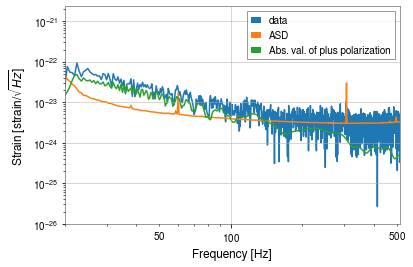

In [30]:
#to plot the frequency domain  
injection = ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

H1 = ifos[0]
H1_injection = injection[0]

fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask  # This is a boolean mask of the frequencies which we'll use in the analysis
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")
ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["plus"][idxs]),
          label="Abs. val. of plus polarization")

ax.set_xlim(20.,512.)
ax.set_ylim(1e-26,2.327737159425905e-21)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.show()

In [43]:
# Create priors
prior = injection_parameters.copy()
prior['mass'] = bilby.core.prior.Uniform(45, 55, r'$M$', unit='$M_sun$')
#prior['mass'] = bilby.core.prior.Uniform(45, 55, r'$M$', unit='$M_sun$')
# Define likelihood
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(interferometers=ifos, waveform_generator=waveform_generator, priors=prior)

In [ ]:
# Launch sampler
result = bilby.core.sampler.run_sampler(likelihood, prior, sampler='dynesty', npoints=500, injection_parameters=injection_parameters, outdir=outdir, label=label, dlogz=3, npool=8)

10:10 bilby INFO    : Running for label 'moving_bbh', output will be saved to 'outdir'
10:10 bilby INFO    : Using lal version 7.1.2
10:10 bilby INFO    : Using lal git version Branch: None;Tag: lalsuite-v6.82;Id: cf792129c2473f42ce6c6ee21d8234254cefd337;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
10:10 bilby INFO    : Using lalsimulation version 2.5.1
10:10 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsuite-v6.82;Id: cf792129c2473f42ce6c6ee21d8234254cefd337;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
10:10 bilby INFO    : Search parameters:
10:10 bilby INFO    :   mass = Uniform(minimum=45, maximum=55, name='$M$', latex_label='$M$', unit='$M_sun$', boundary=None)
10:10 bilby INFO    :   ratio = 6
10:10 bilby INFO    :   distance = 300
10:10 bilby INFO    :   theta = 45
10:10 bilby INFO    :   phi = 45
10:10 bilby INFO    :   speed = 3000
10:10 bilby INFO    :   v_the = 0
10:10 bilby INFO    :   v_p

-1.98 0.019023437500000018 0.0009765625 2048
0.0 512.0 0.5 1025
-1.98 0.019023437500000018 0.0009765625 2048
0.0 512.0 0.5 1025
-1.98 0.019023437500000018 0.0009765625 2048
0.0 512.0 0.5 1025
-1.98 0.019023437500000018 0.0009765625 2048
0.0 512.0 0.5 1025
-1.98 0.019023437500000018 0.0009765625 2048
0.0 512.0 0.5 1025
-1.98 0.019023437500000018 0.0009765625 2048
0.0 512.0 0.5 1025
-1.98 0.019023437500000018 0.0009765625 2048
0.0 512.0 0.5 1025
-1.98 0.019023437500000018 0.0009765625 2048
0.0 512.0 0.5 1025
-1.98 0.019023437500000018 0.0009765625 2048
0.0 512.0 0.5 1025
-1.98 0.019023437500000018 0.0009765625 2048
0.0 512.0 0.5 1025
-1.98 0.019023437500000018 0.0009765625 2048
0.0 512.0 0.5 1025
-1.98 0.019023437500000018 0.0009765625 2048
0.0 512.0 0.5 1025
-1.98 0.019023437500000018 0.0009765625 2048
0.0 512.0 0.5 1025
-1.98 0.019023437500000018 0.0009765625 2048
0.0 512.0 0.5 1025
-1.98 0.019023437500000018 0.0009765625 2048
0.0 512.0 0.5 1025
-1.98 0.019023437500000018 0.0009765625 

In [9]:
ifos[0].time_domain_strain

array([ 6.45101852e-23, -1.40381007e-24,  1.28633590e-23, ...,
       -1.57319829e-24,  3.34836117e-23,  2.30520039e-23])

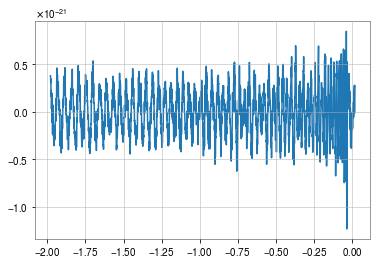

In [51]:
plt.plot(H1.strain_data.time_array,H1.strain_data.time_domain_strain)

In [11]:
H1.strain_data.time_domain_strain

array([ 6.45101852e-23, -1.40381007e-24,  1.28633590e-23, ...,
       -1.57319829e-24,  3.34836117e-23,  2.30520039e-23])

In [7]:
import h5py
import numpy as np
  
# initializing a random numpy array
arr1 = np.random.randn(10000)
arr2 = np.random.randn(10000)
  
# creating a file
with h5py.File('test_read.hdf5', 'w') as f:
    f.create_dataset('array_1', data = arr1)
    f.create_dataset('array_2', data = arr2)

In [18]:
# open the file as 'f'

with h5py.File('test_read.hdf5', 'r') as f:
    d1 = list(f['array_1'])
    d2 = list(f['array_2'])

In [26]:
with h5py.File('com_time_series.hdf5', 'w') as f:
    f.create_dataset('t', data = H1.strain_data.time_array)
    f.create_dataset('h(t)', data = H1.strain_data.time_domain_strain)

In [28]:
with h5py.File('com_time_series.hdf5', 'r') as f:
    t = list(f['t'])
    h = list(f['h(t)'])

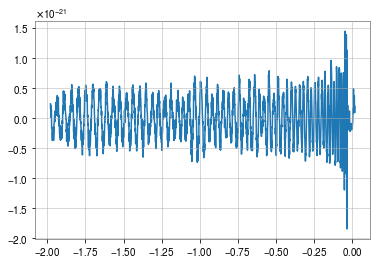

In [29]:
plt.plot(t,h)

In [31]:
L1 = ifos[1]

with h5py.File('com_time_series_L1.hdf5', 'w') as f:
    f.create_dataset('t', data = L1.strain_data.time_array)
    f.create_dataset('h(t)', data = L1.strain_data.time_domain_strain)

In [13]:
H1 = ifos[0]
L1 = ifos[1]

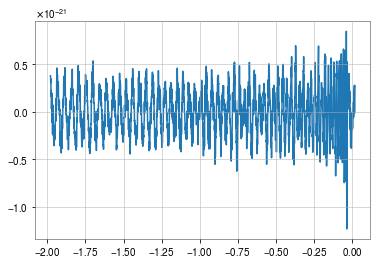

In [55]:
plt.plot(H1.strain_data.time_array,H1.strain_data.time_domain_strain)

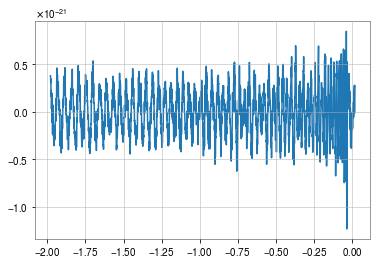

In [65]:
plt.plot(L1.strain_data.time_array,H1.strain_data.time_domain_strain)

(-0.038, -0.036)

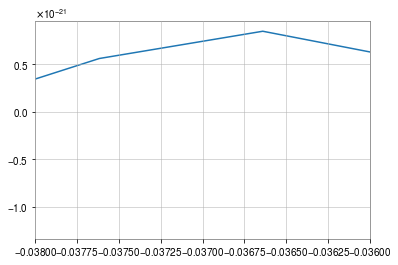

In [63]:
fig, ax = plt.subplots()
ax.plot(H1.strain_data.time_array,H1.strain_data.time_domain_strain)
ax.set_xlim(-0.038,-0.036)

(-0.038, -0.036)

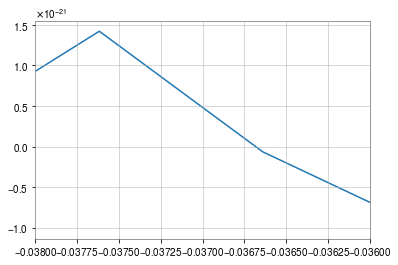

In [62]:
fig, ax = plt.subplots()
ax.plot(L1.strain_data.time_array,L1.strain_data.time_domain_strain)
ax.set_xlim(-0.038,-0.036)

In [70]:
ht = H1.strain_data.time_array[np.argmax(H1.strain_data.time_domain_strain)]
lt = L1.strain_data.time_array[np.argmax(L1.strain_data.time_domain_strain)]
ht-lt

0.0009765625

In [16]:
ht = H1.strain_data.time_array[np.argmax(H1.strain_data.time_domain_strain)]
lt = L1.strain_data.time_array[np.argmax(L1.strain_data.time_domain_strain)]
ht-lt

-0.0009765625

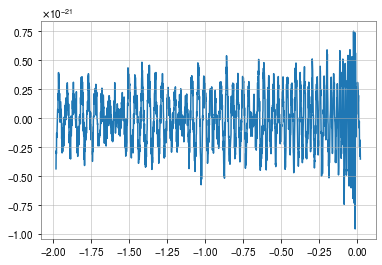

In [14]:
plt.plot(H1.strain_data.time_array,H1.strain_data.time_domain_strain)

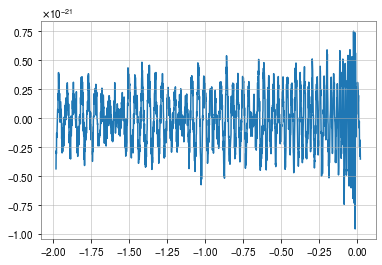

In [15]:
plt.plot(L1.strain_data.time_array,H1.strain_data.time_domain_strain)

In [9]:
test = H1.strain_data.time_array

In [10]:
len(test)

2048

In [13]:
dt = 1/sampling_frequency
np.arange(start_time,start_time+2048*dt,dt)

array([-1.98      , -1.97902344, -1.97804687, ...,  0.01707031,
        0.01804688,  0.01902344])

In [11]:
test

array([-1.98      , -1.97902344, -1.97804687, ...,  0.01707031,
        0.01804688,  0.01902344])

In [15]:
test2 = H1.strain_data.time_array

In [16]:
test

array([-1.98      , -1.97902344, -1.97804687, ...,  0.01707031,
        0.01804688,  0.01902344])

In [43]:
#frequency domain
H1.strain_data.frequency_array

array([0.000e+00, 5.000e-01, 1.000e+00, ..., 5.110e+02,
       5.115e+02, 5.120e+02])

In [49]:
#time domain
H1.strain_data.frequency_array

array([0.000e+00, 5.000e-01, 1.000e+00, ..., 5.110e+02,
       5.115e+02, 5.120e+02])

In [21]:
#frequency domain
test1 = H1_injection["plus"]

In [31]:
# gwpy fft frequency domain
test3 = H1_injection["plus"]

In [25]:
#time domain
test2 = H1_injection["plus"]

In [33]:
test3

array([1.80360156e-25+0.00000000e+00j,
       3.46942808e-25+3.84932968e-26j,
       3.45881746e-25+5.41421062e-26j, ...,
       5.04840882e-25-5.39860750e-26j,
       5.07309793e-25-2.70419804e-26j,
       5.08133623e-25+0.00000000e+00j])

In [35]:
test1 - test2

array([ 0.00000000e+00+0.00000000e+00j,
        9.18354962e-41-1.30865582e-39j,
        1.14794370e-39+2.18109303e-40j, ...,
       -8.26519465e-40-3.55862548e-40j,
        5.51012977e-40+4.01780296e-40j,
        0.00000000e+00+0.00000000e+00j])

In [34]:
np.sum(test3 - test2)

(-1.8036015561509885e-25+0j)

In [45]:
np.save('frequency_domain_strain_1', H1.strain_data.frequency_domain_strain)

In [28]:
b = np.load('time_array.npy')

In [29]:
b

array([-1.98      , -1.97902344, -1.97804687, ...,  0.01707031,
        0.01804688,  0.01902344])

In [36]:
np.arange(start_time, start_time+duration, 1/sampling_frequency)

array([-1.98      , -1.97902344, -1.97804687, ...,  0.01707031,
        0.01804688,  0.01902344])

In [35]:
1/sampling_frequency+start_time

-1.9790234375

In [37]:
-1.98+2.

0.020000000000000018

In [ ]:
#print(times[0],times[-1],times[1]-times[0],len(times))
#print(freq_array[0],freq_array[-1],freq_array[1]-freq_array[0],len(freq_array))
-1.98 0.019023437500000018 0.0009765625 2048
0.0 512.0 0.5 1025